In [1]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [2]:
df.head()

Glucose   BMI  Outcome
0      148  33.6        1
1       85  26.6        0
2      183  23.3        1
3       89  28.1        0
4      137  43.1        1

In [3]:
df.shape

(768, 3)

In [4]:
# find the count of missing values in each column
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [5]:
# Selecting all rows and all columns except the last one for features and  convert into NumPy arrays
X=df.iloc[:,:-1].to_numpy()
# Selecting all rows and the last column for the target and convert  into NumPy arrays
y=df.iloc[:,-1].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
'''
y-target variable
X-input columns
random_state=0 ensures that the data split will be the same every time you run the code with the same input data.
test size=20%
train size=80%
'''
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)#This instantiates a DecisionTreeClassifier object named clf.
clf.fit(X_train,y_train)#This line trains the decision tree classifier on the training data.

DecisionTreeClassifier(criterion='entropy', random_state=0)

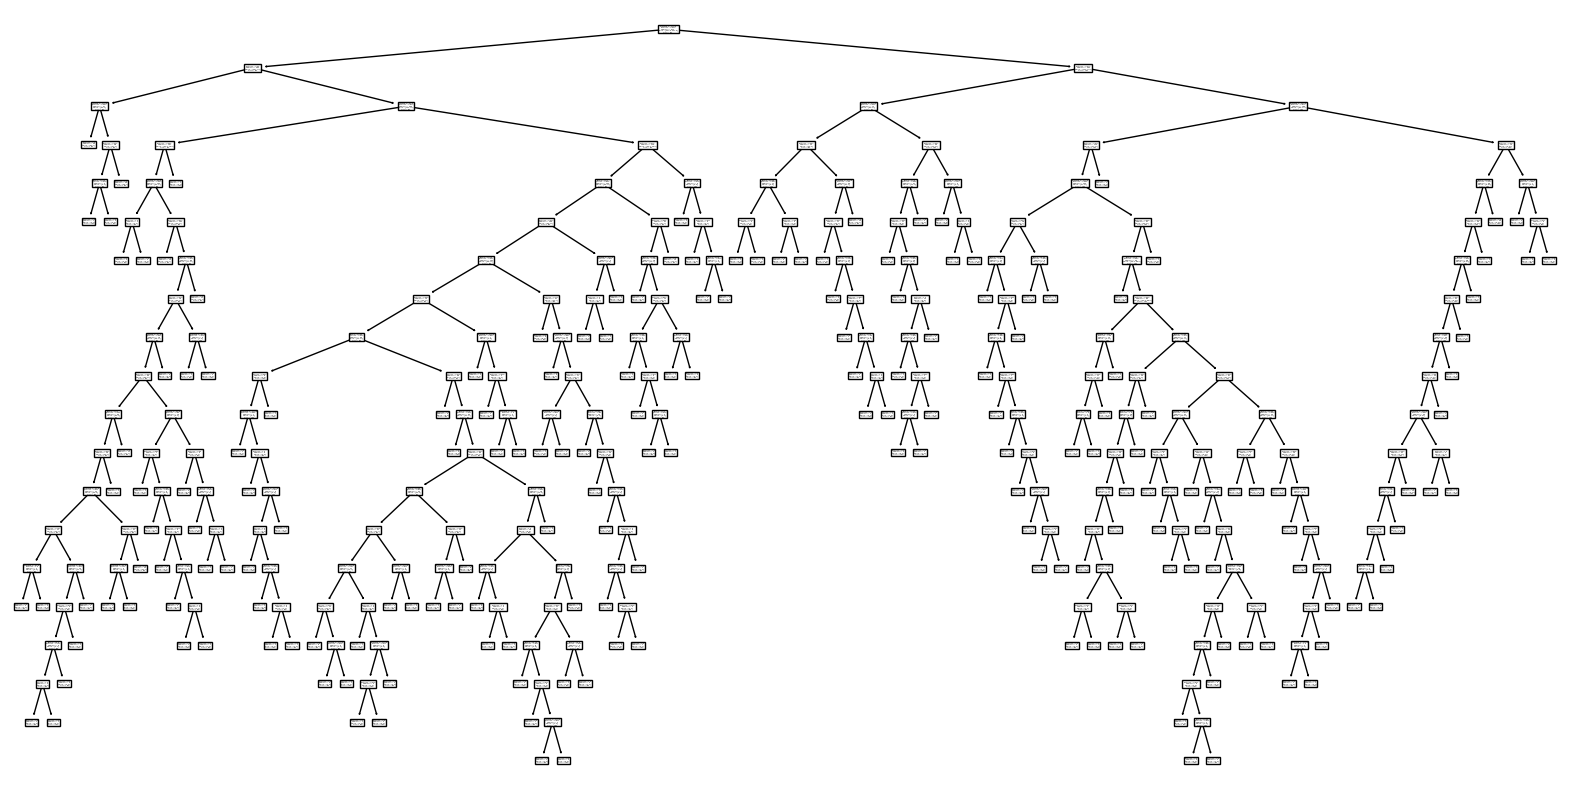

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree#This imports the plot_tree function from scikit-learn's tree module. 
#This function allows you to visualize decision trees trained using scikit-learn.

plt.figure(figsize=(20,10))#The figsize parameter specifies the width and height of the figure in inches.
'''feature_names parameter specifies the names of the features used in the tree, and 
the class_names parameter specifies the names of the target classes.'''
plot_tree(clf,feature_names=['Glucose','BMI'],class_names=['No','Yes'])
plt.show()

In [10]:
#The set_params method in scikit-learn allows you to set parameters of an estimator after it has been initialized
clf.set_params(max_depth=3)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

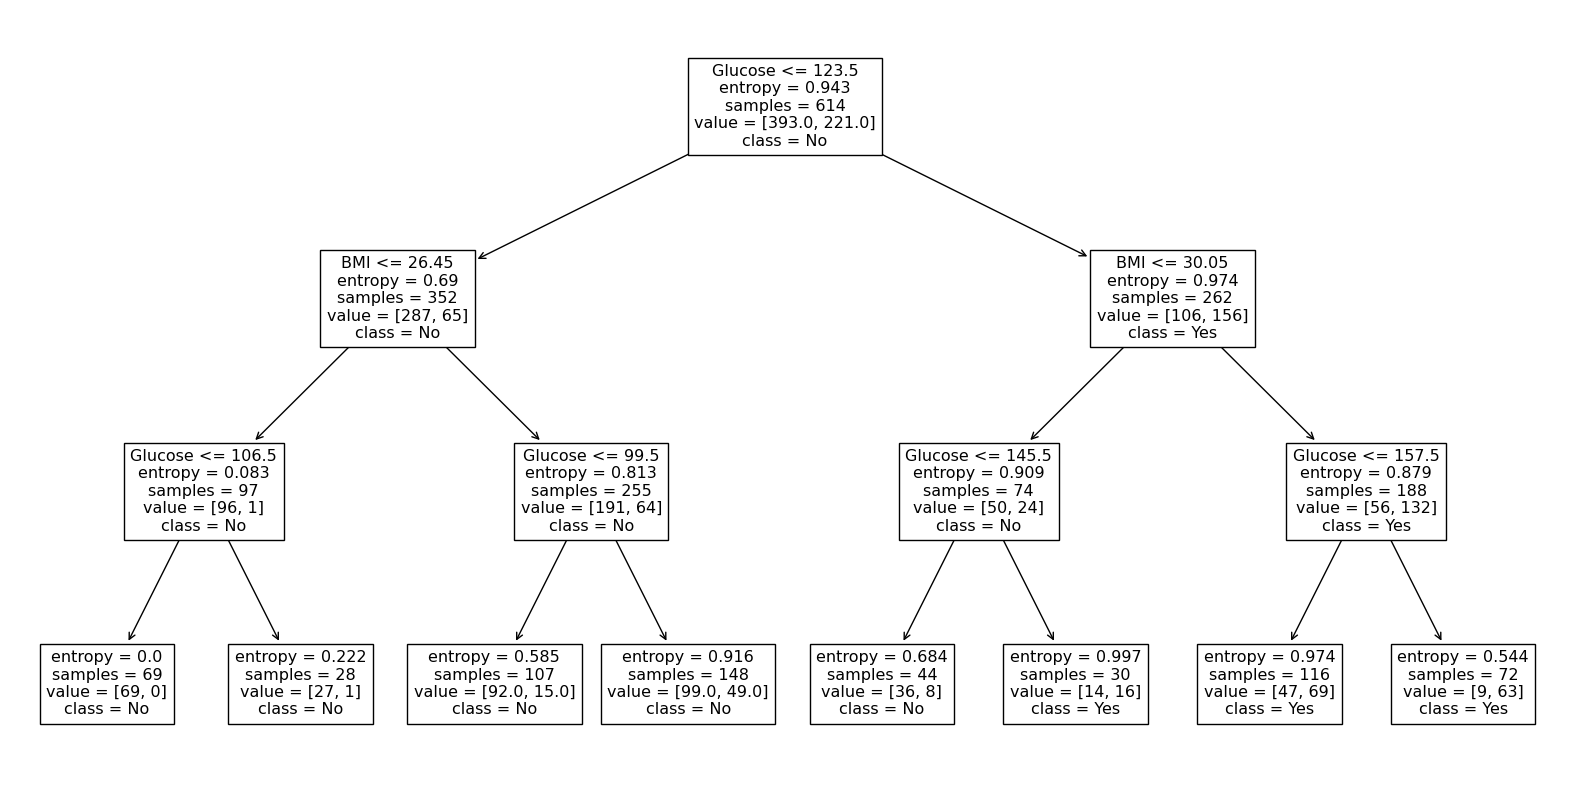

In [11]:
clf.fit(X_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=['Glucose','BMI'],class_names=['No','Yes'])
plt.show()

In [13]:
#The predict method takes the test features (X_test) as input and returns the predicted target labels.
predictions=clf.predict(X_test)

In [14]:
clf.predict([[90,20],[200,30]])

array([0, 1], dtype=int64)

In [15]:
from sklearn.model_selection import cross_val_score
#cross_val_score function
'''
This line performs 5-fold cross-validation (cv=5) on your decision tree classifier (clf) using the training data (X_train and y_train). 
The scoring parameter specifies that you're interested in accuracy as the evaluation metric.'''
scores=cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
accuracy=scores.mean()#calculates the mean accuracy across the 5 folds of cross-validation.
accuracy

0.7378115420498468

In [16]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,predictions)
cf

array([[90, 17],
       [20, 27]], dtype=int64)

In [17]:
tp=cf[1][1]
tn=cf[0][0]
fp=cf[0][1]
fn=cf[1][0]
print(f"tp:{tp}, tn:{tn},fp:{fp},fn:{fn}")

tp:27, tn:90,fp:17,fn:20


In [18]:
print("accuracy",metrics.accuracy_score(y_test,predictions))

accuracy 0.7597402597402597


In [19]:
print("Precision",metrics.precision_score(y_test,predictions))

Precision 0.6136363636363636


In [20]:
print("Recall",metrics.recall_score(y_test,predictions))

Recall 0.574468085106383


In [21]:
feature_importances = clf.feature_importances_
# Now, feature_importances contains the importance of each feature
print("Feature importances:",feature_importances)

Feature importances: [0.69040847 0.30959153]
